In [1]:
# Let me provide the context first!
# This is a exercise that simulates the real thing, the interaction between Data Science and 
# Machine Learning teams, in a small scale of course, but you will get the point :))

# These are the roles:
# 1) I'm Lisa, the Machine Learning Team Leader, and I'm a facilitator.
# 2) Brunno is a Data Scientist and it is working on a very clever model that's going to change the world and 
# make the Business Unit very happy. This model is a classifier which uses 4 features (input variables) to define 
# an output.
# 3) You are our Machine Learning Engineer and has a mixed hard-skills such as coding software, machne learning 
# and DevOps. 

# Data Science cycle is commomly divided into 4 steps:
# 1. Business understanding
# 2. Data acquisition and understanding (includes capture, preparation, wragling, exploration and cleaning)
# 3. Modeling (includes Feature engineering, model training and evaluation) 
# 4. Model deployment into production (includes scoring, performance monitoring etc)
# More info available on: 
# https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/overview

# As a Machine Learning Engineer you are committed to productize ML models and make life easier for DS team. 
# Challenge is going to prepare you to make the right decisions so that the transition from step 3 to step 4 
# occurs smoothly. 
# It means you need to pick up the model made at step 3 and put it into production on step 4.

In [2]:
# Beginning of the DS journey... bear in mind you don't need touch anything here, but it is a good thing 
# to understand this snippet of code

In [3]:
# import all important stuff
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
# more about this dataset: https://en.wikipedia.org/wiki/Iris_flower_data_set

# visualize what'is inside
pd_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
pd_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
# replace target's number by labels in pd_iris
def addLabel(x):
    if x == 0:
        return 'setosa'
    elif x == 1:
        return 'versicolor'
    else:
        return 'virginica'
    
pd_iris['target'] = pd_iris['target'].apply(addLabel)
pd_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


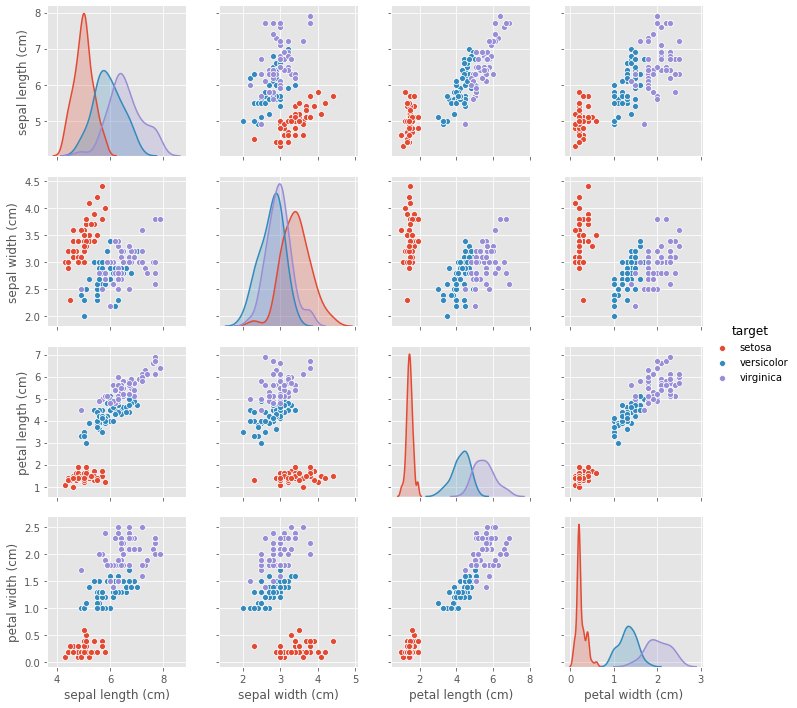

In [7]:
# see the scatterplot of the data set
plt.style.use('ggplot')
sns.pairplot(pd_iris, hue= 'target')

In [8]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

In [9]:
# build the model
clf = RandomForestClassifier(n_estimators=10)

In [10]:
# train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# make some predictions
predicted = clf.predict(X_test)

In [12]:
# check accuracy of this model
print(accuracy_score(predicted, y_test))

0.9866666666666667


In [14]:
# End of the DS journey!!!
# clf model seems okay and Brunno has just said: "I need it into production pleeeeeease"
# From now on, you, as machine learning engineer, needs to make it available for business unit and 
# make Brunno happy

In [27]:
# But before you go ahead,let me give you some instructions to make your life easier:

# 1. In general, the trained model should be saved in a file and restored in order to reuse it: The saving of data
# is called serializaion, while restoring the data is called deserialization

# 2. clf model needs to be available to anyone on Internet (and locally for development tests)

# 3. clf model shall be triggered through a synchronous HTTP request

# 4. User shall be able to access this clf model through the Browser, Postman or any another tool like that 

# 5. Post method shall have the four mandatory features, i.e. sepal length, sepal width, petal lentgh, petal width
# and model's answer shall be 0, 1 or 2 (i.e. setosa, virginica or versicolor)
#
# request is something like that: 
# features_input = [[5.8, 2.7, 5.1, 1.9]]
# model's output should be like that:
# output_prediction = clf.predict(features_input)

# 6. Solution needs to be scalable and run everywhere

# 7. Containerization is a key point

# 8. Python coding shall simplify a little bit how things should be done in the backend

# 9. It might be good to include a simple healthcheck: we can easily check if model is on or not

In [30]:
# What we expect you can deliver at the end of this challenge:

# 1. Present an architectural diagram of the solution: list all the components required to make clf model 
# available in the production environment

# 2. Put clf model to work locally or in any cloud but don't forget the steps 6/7 above (run everywhere) and 
# make it very simple to test

In [ ]:
# I hope you can make your best and I wish you a good luck!!

In [ ]:
# End of challenge